# Topic:  Direct Marketing Campaign  Review for Portuguese Bank

# Aims

In this project, I explore the available data for the Portugues Banking - direct marking campaign and investigate on how the institution can decrease the outbound call rates and use inbound calls and information for cross-selling and maximise the profits. In other words, I used different graphs to explore the relationship that exist between output variable (y) and other selected feature and compared the performance of different machine learning models as well as chosen an appropriate model to predict the potential customer that may be targeted for a sales campaign. The final model is selected based on the highest performance of the AUC score. This project also analyses factor that is influence the customer decision to subscribe to a term deposit. 

# Executive Summary 




# Contents

In [ ]:

1. Libraries importation
2. Data Importation and Exploration
3. Data preprocessing and preparation
4. Model Training and Result Evaluation
5. Tuning the hyper-parameter estimators
6. Diagnostic through learning curves
7  Combined voting esembling
8.Model deployment 
9.Conclusion

# 1.Libraries importation


In [1]:

import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from collections import OrderedDict
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 2. Data Importation and Exploration


In [2]:
#I read the Portuguese banking institution  dataset in a pandas DataFrame with read_csv() and check the contents with the .head() method.

df = pd.read_csv(r'C:\Users\Ajay\Desktop\NoteMachine\nationwide.csv')



In [3]:


df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.shape


(45211, 17)

In [8]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [640]:
plt.rcParams['figure.figsize'] = (6,4)

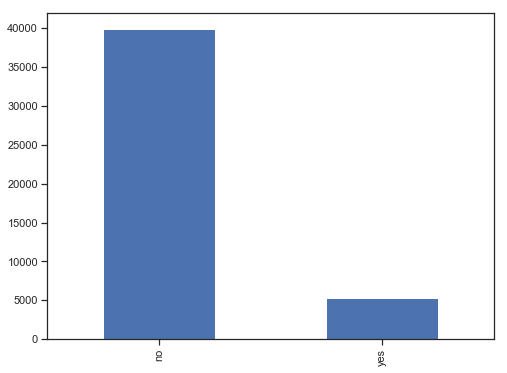

In [644]:
# Visual exploration is the most effective way to extract information between variables.
df['y'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (6,4)
#df.y.value_counts().plot(kind="barh")

In [406]:
deposite_percentage = 5289*100/45211
deposite_percentage

11.698480458295547

In [407]:
Non_deposite_percentage = 39922*100/45211
Non_deposite_percentage

88.30151954170445

In [115]:
# Impact of the education on the output variables 

pd.crosstab(index=df["education"], columns=df["y"])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


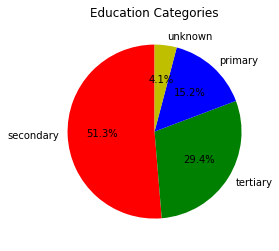

In [404]:
ctivities = ['secondary', 'tertiary', 'primary', 'unknown']
colors = ['r', 'g', 'b', 'y']
plt.pie(df['education'].value_counts(), labels=ctivities, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Education Categories')
plt.show()

In [474]:

plt.rcParams['figure.figsize'] = (8,6)

Text(0, 0.5, 'Frequency')

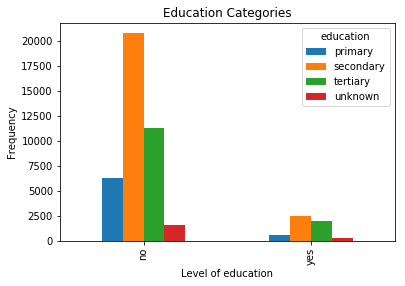

In [408]:
tem = pd.crosstab(df['y'], df['education'])
tem.plot(kind = 'bar')
plt.title('Education Categories')
plt.xlabel('Level of education')
plt.ylabel('Frequency')

In [429]:
# In this section, I did a mini calculation to explore the education categories of who have invested in the invest in Portuguese banking 

Education_yes_categories = 591+2450+1996+252
Education_yes_categories

percetage_secondary = 2450*100/Education_yes_categories

percetage_secondary

46.3225562488183

In [431]:
percetage_tertiary = 1996*100/Education_yes_categories
percetage_tertiary

37.73870296842503

In [432]:
percetage_primary = 591*100/Education_yes_categories
percetage_primary

11.174134997163925

In [433]:

percetage_unknow = 252*100/Education_yes_categories
percetage_unknow


4.76460578559274

In [440]:

with open('Education_yes_prop.csv', 'w', newline ='') as f:
    thewriter = csv.writer(f)
    
    thewriter.writerow(['Scondary','Tertiary','Primary','unknown'])
    thewriter.writerow([percetage_secondary,  percetage_tertiary, percetage_primary, percetage_unknow])

In [441]:

Dep_education = pd.read_csv('Education_yes_prop.csv')

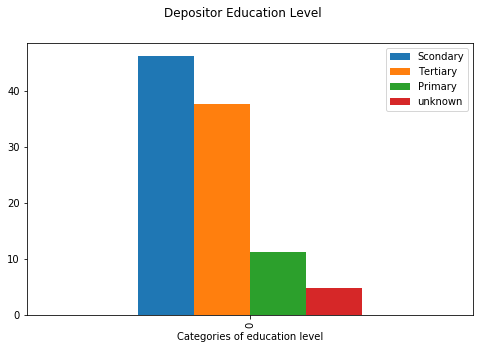

In [446]:
# Investor Educational qualification 

Dep_education.plot(kind = 'bar', figsize = (8, 5))
plt.suptitle('Depositor Education Level')
plt.xlabel('Categories of education level')
plt.legend()
plt.show()

In [629]:
plt.rcParams['figure.figsize'] = (6,4)

Text(0.5, 0.98, 'Age')

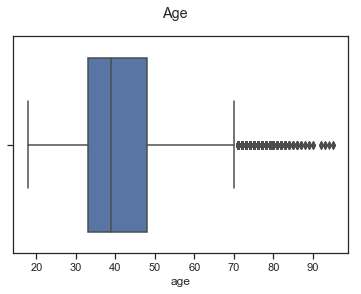

In [630]:
 # Impact of the age on the output variables 
g = sns.boxplot(x=df["age"])

plt.suptitle('Age')

Text(0, 0.5, 'Frequency')

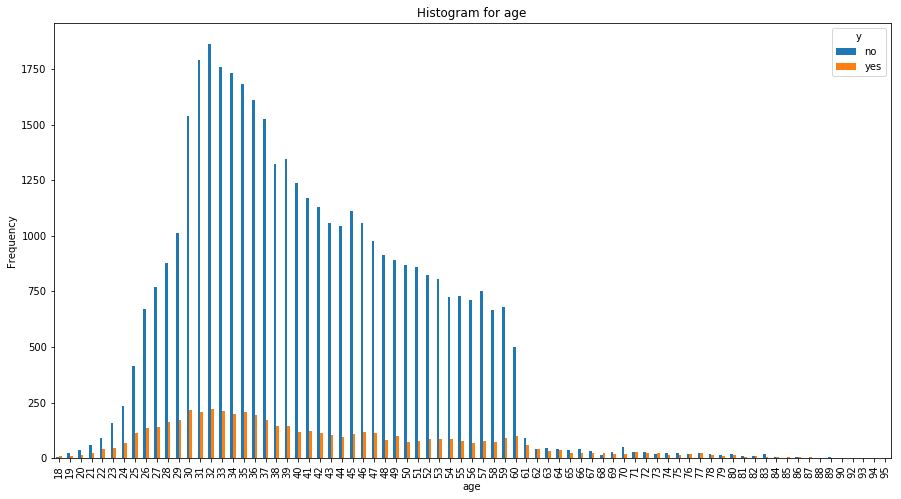

In [235]:

tem = pd.crosstab(df['age'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for age')
plt.xlabel('age')
plt.ylabel('Frequency')


In [269]:
# Impact of the marital status on the output variables
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0, 0.5, 'Frequency')

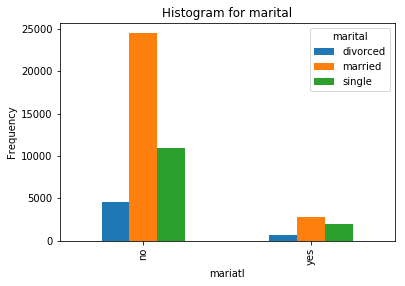

In [230]:

tem = pd.crosstab(df['y'], df['marital'])
tem.plot(kind = 'bar')
plt.title('Histogram for marital')
plt.xlabel('mariatl')
plt.ylabel('Frequency')


The precentage of the clients contacted are married

In [449]:
# Impact of the marital status on the output variables
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

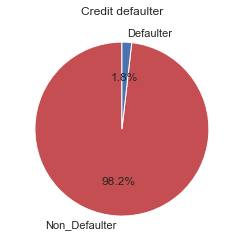

In [536]:
ctivities = ['Non_Defaulter', 'Defaulter']
colors = ['r', 'b']
plt.pie(df['default'].value_counts(), labels=ctivities, colors=colors, startangle=90, autopct='%.1f%%')
plt.rcParams['figure.figsize'] = (6,4)
plt.title('Credit defaulter')
plt.show()

In [271]:
# Impact of the  house loan default on the output variables
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

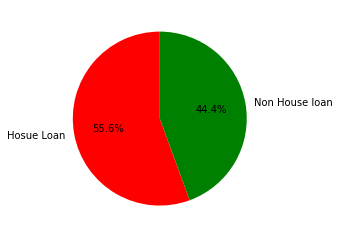

In [391]:
ctivities = ['Hosue Loan', 'Non House loan']
colors = ['r', 'g']
plt.pie(df['housing'].value_counts(), labels=ctivities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

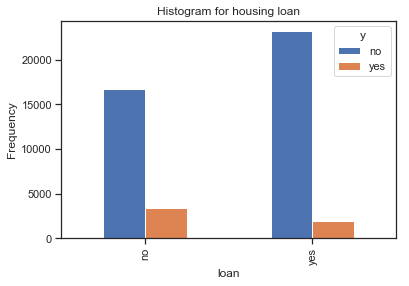

In [631]:
tem = pd.crosstab(df['housing'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for housing loan')
plt.xlabel('loan')
plt.ylabel('Frequency')
plt.savefig('hist_loan')

In [361]:
#  Separation of those who took a loan from those who did not receive the loan
housing_loan = df[df.housing=='yes']
Non_housing_loan = df[df.housing=='no']

#housing_loan['housing'].value_counts()
#Non_housing_loan['housing'].value_counts()

In [367]:
housing_loan.housing.replace(('yes'), (1), inplace=True)
#Non_housing_loan.housing.replace(('no'), (7), inplace=True)

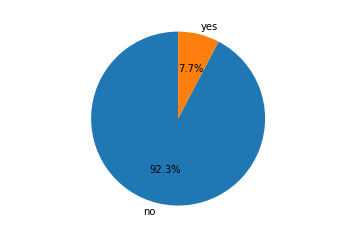

In [380]:
# Percenate of depositor from those that took the loan 
sums = housing_loan.housing.groupby(df.y).sum()
axis('equal');
pie(sums, labels=sums.index, startangle=90, autopct='%.1f%%');
show()

In [393]:
# Impact of contact communication type on the output variables
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

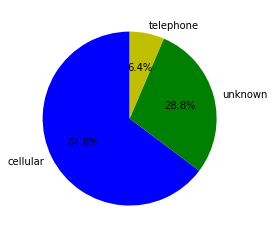

In [395]:
ctivities = ['cellular', 'unknown', 'telephone']
colors = ['b', 'g', 'y']
plt.pie(df['contact'].value_counts(), labels=ctivities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

Text(0, 0.5, 'Frequency')

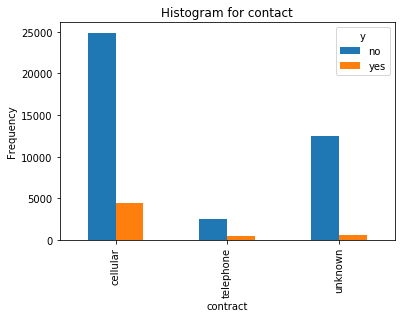

In [451]:
tem = pd.crosstab (df['contact'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for contact')
plt.xlabel('contract')
plt.ylabel('Frequency')

From the total population contacted, 65% were contacted using cellular compared to 6%  of the telephone and 29% of other means of communication. Evidence also revealed that clients that called by cellular tend to invest than other means of communication. 



In [452]:
# Impact of poutcome on the output variables

df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

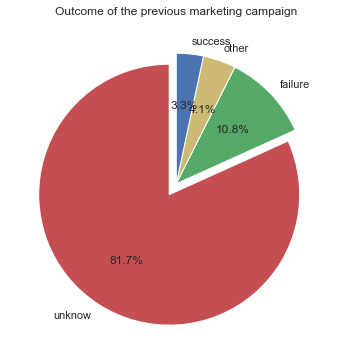

In [639]:
activities = ['unknow', 'failure', 'other', 'success']
colors = ['r', 'g', 'y', 'b']
explode = (0.1, 0, 0, 0)
plt.rcParams['figure.figsize'] = (8,6)
plt.title('Outcome of the previous marketing campaign')
plt.pie(df['poutcome'].value_counts(), labels=activities,explode=explode, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

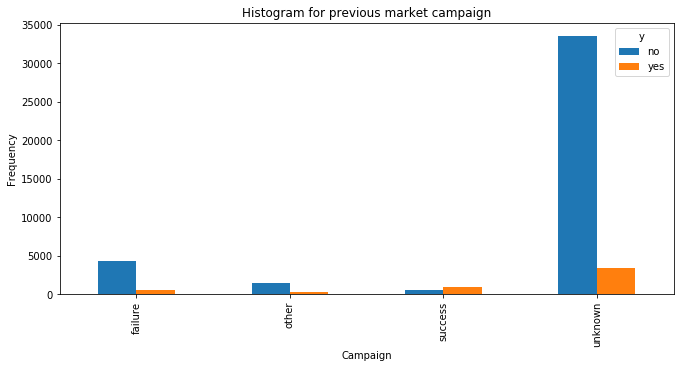

In [243]:
tem = pd.crosstab(df['poutcome'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for previous market campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.savefig('hist_campaign')

In [ ]:
The staffs attidtue to the clients have been very poor. 

In [454]:
# Impact of months type on the output variables
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [543]:
pd.crosstab(index=df["month"], columns=df["y"])

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


Text(0, 0.5, 'Frequency')

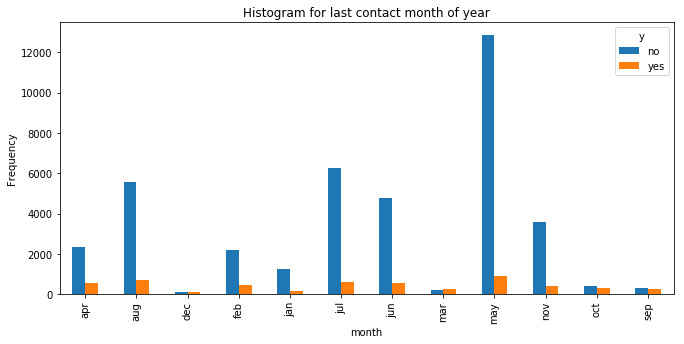

In [250]:
tem = pd.crosstab(df['month'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for last contact month of year')
plt.xlabel('month')
plt.ylabel('Frequency')

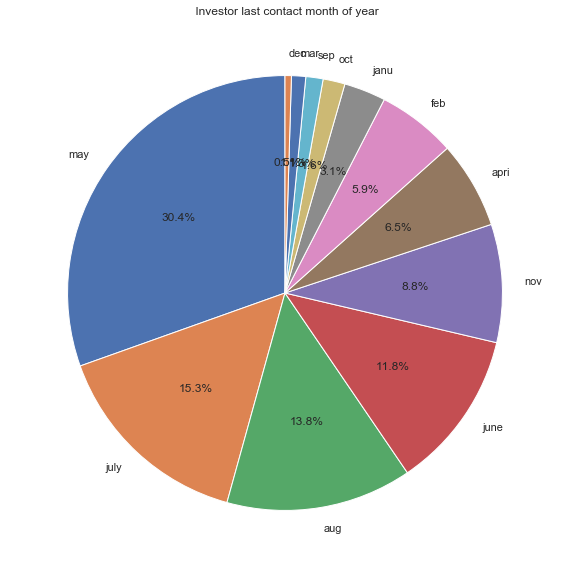

In [634]:
activities = ['may', 'july', 'aug', 'june', 'nov','apri','feb', 'janu','oct', 'sep','mar', 'dec']
plt.rcParams['figure.figsize'] = (14,10)
plt.pie(df['month'].value_counts(), labels=activities,  startangle=90, autopct='%.1f%%')
plt.title(' Investor last contact month of year')
plt.show()

In [557]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [555]:
pd.crosstab(index=df["day"], columns=df["y"])


y,no,yes
day,,
1,232,90
2,1111,182
3,901,178
4,1215,230
5,1695,215
6,1751,181
7,1660,157
8,1641,201
9,1382,179


In [636]:
plt.rcParams['figure.figsize'] = (8,6)

Text(0.5, 1.0, 'days')

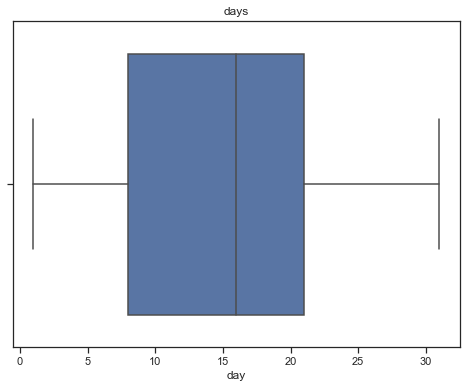

In [637]:
 # Impact of the age on the output variables 
g = sns.boxplot(x=df["day"])
plt.title('days')

Text(0, 0.5, 'Frequency')

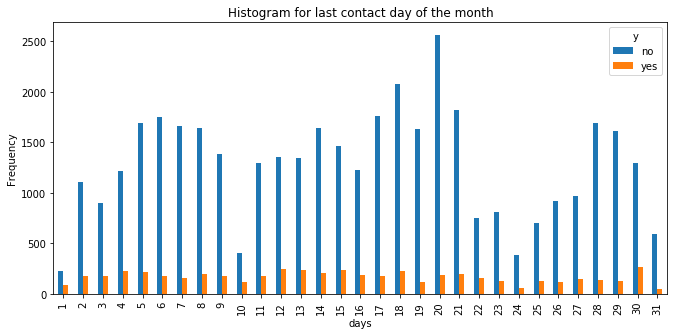

In [249]:
tem = pd.crosstab(df['day'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for last contact day of the month')
plt.xlabel('days')
plt.ylabel('Frequency')

In [ ]:
tem = pd.crosstab(df['age'], df['y'])
tem.plot(kind = 'bar')
plt.title('Histogram for age')
plt.xlabel('age')
plt.ylabel('Frequency')

In [558]:
pd.crosstab(index=df["duration"], columns=df["y"])

y,no,yes
duration,,
0,3,0
1,2,0
2,3,0
3,4,0
4,15,0
5,35,0
6,45,0
7,73,0
8,84,1


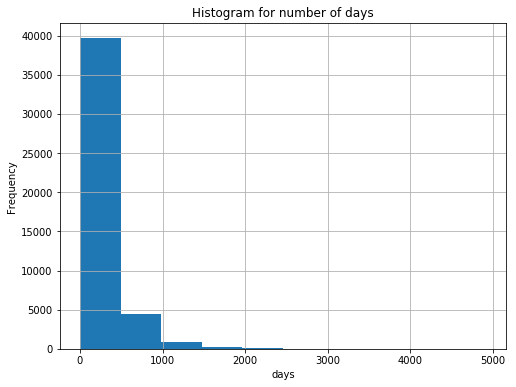

In [476]:
df.duration.hist()
plt.title('Histogram for number of days')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.savefig('hist_day')

In [492]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [500]:
pd.crosstab(index=df["job"], columns=df["y"])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


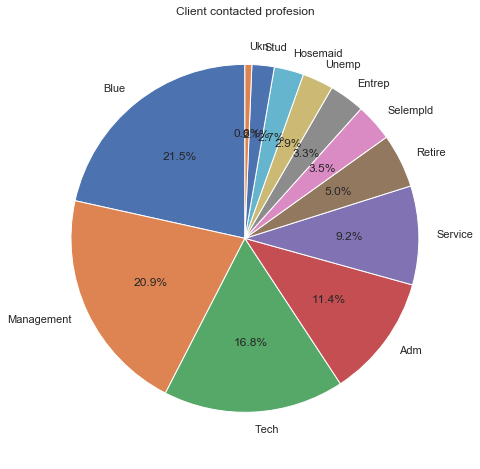

In [526]:
activities = ['Blue', 'Management', 'Tech', 'Adm', 'Service','Retire','Selempld', 'Entrep','Unemp', 'Hosemaid','Stud', 'Ukn']
plt.pie(df['job'].value_counts(), labels=activities,  startangle=90, autopct='%.1f%%')
plt.title('Client contacted profesion')
plt.show()

In [511]:
Job_invest = df[df.job=='yes']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


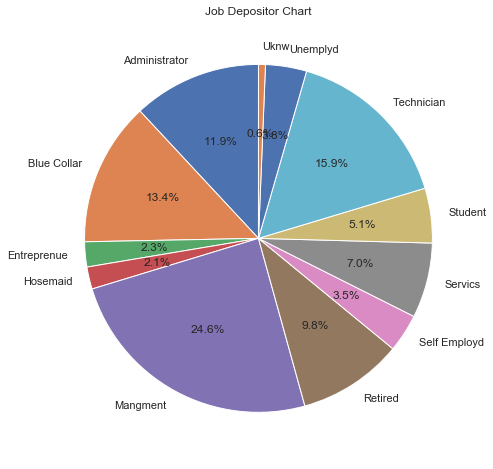

In [527]:
depositor = [631, 708, 123, 109, 1301, 516, 187,369, 269, 840, 202, 34]
activities = ['Administrator', 'Blue Collar', 'Entreprenue', 'Hosemaid', 'Mangment','Retired', 'Self Employd', 'Servics','Student','Technician', 'Unemplyd', 'Uknw' ]
plt.pie(depositor, labels=activities, startangle=90, autopct='%.1f%%')
plt.title('Job Depositor Chart')
plt.show()

 From the total number of the clients contacted, 22% have blue collar job, 21% are in management profession, 17% is a technician, and 11% is an administrator. The least contacted are the clients that did not specified their profession (unknown 0.6%), followed by student(2.2%), housemaid (2.7%), unemployed (2.9%), entrepreneur(3.3%), self employed(3.5%), retired(5%) and service personnel (9%). Despite the huge number of the clients contacted for Collar Job, only a few clients invested in Portuguese banking. For example, 22% of the clients contacted had a collar job, but 13% only invested. For management, 21% contacted, 25% of them invested. I also noticed that the students are the second least contacted. However, the proportion at which student invested is higher than the unemployed, self-employed, housemaid and Entrepreneur. For example, 2.2% of the clients contacted were student compared with 2.7% for a housemaid, 2.9% for unemployment and 3.3% for the entrepreneur. In contrast, 5% of the clients invested are students, 2% are entrepreneur and Housemaid, 4% are unemployed and self-employed. 
 

# 3. Data preprocessing and preparation

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [77]:
# Converting object type data into One-Hot En coded data using get_dummies method
df_new = pd.get_dummies(df, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

#Target column into binary format
df_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [14]:
# To view the new dataset. You will notice that the data have been converted 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
y                      45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_div

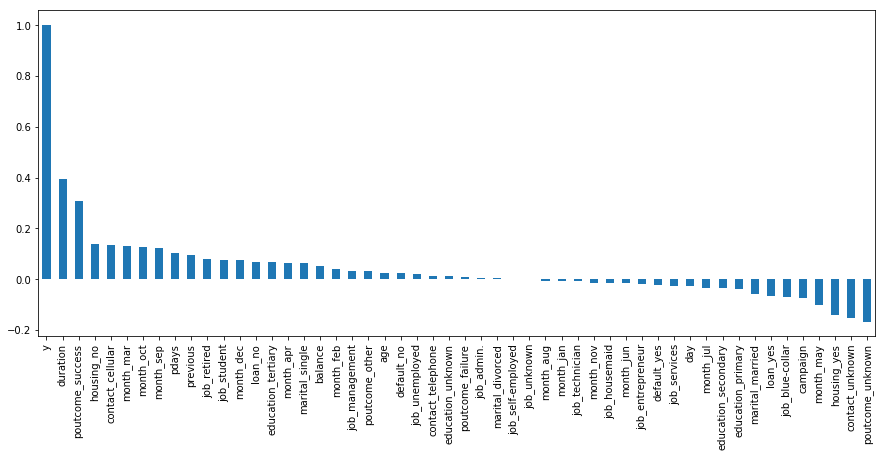

In [47]:
# I plot the correlation to examine the relationship between the dependent variable and explanatory variables 
plt.figure(figsize=(15,6))
df_new.corr()['y'].sort_values(ascending=False).plot.bar()

In [80]:

#We identify the following variables as an irrelvant variables becuase they all appear not to have signifcant impact on client subscription decision 


var_del  = ['poutcome_other', 'month_feb', 'job_management', 'age', 'default_no', 'job_unemployed', 
            'contact_telephone', 'education_unknown', 'poutcome_failure', 'job_admin.','marital_divorced',
            'job_self-employed', 'job_unknown', 'month_aug', 'month_jan', 'job_technician', 'month_nov', 
            'job_housemaid','month_jun', 'job_entrepreneur']

In [81]:

# we drop the variables
df_new.drop(var_del,axis = 1, inplace= True)

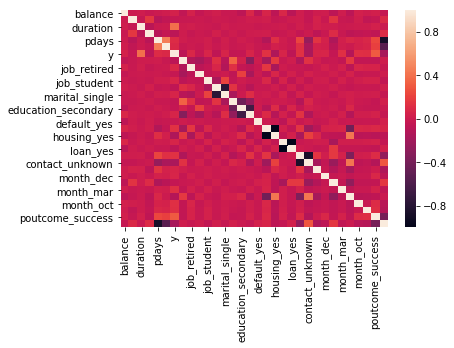

In [82]:

sns.heatmap(df_new.corr())

In [84]:
df_new.describe()

,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_retired,job_services,...,contact_unknown,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.215257,0.050076,0.09188,...,0.287983,0.064851,0.004733,0.152507,0.010551,0.304483,0.016323,0.012807,0.033421,0.817478
std,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.411005,0.218105,0.28886,...,0.452828,0.246266,0.068637,0.359516,0.102174,0.460193,0.126718,0.112441,0.179735,0.386278
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF69155588>,
      dtype=object)

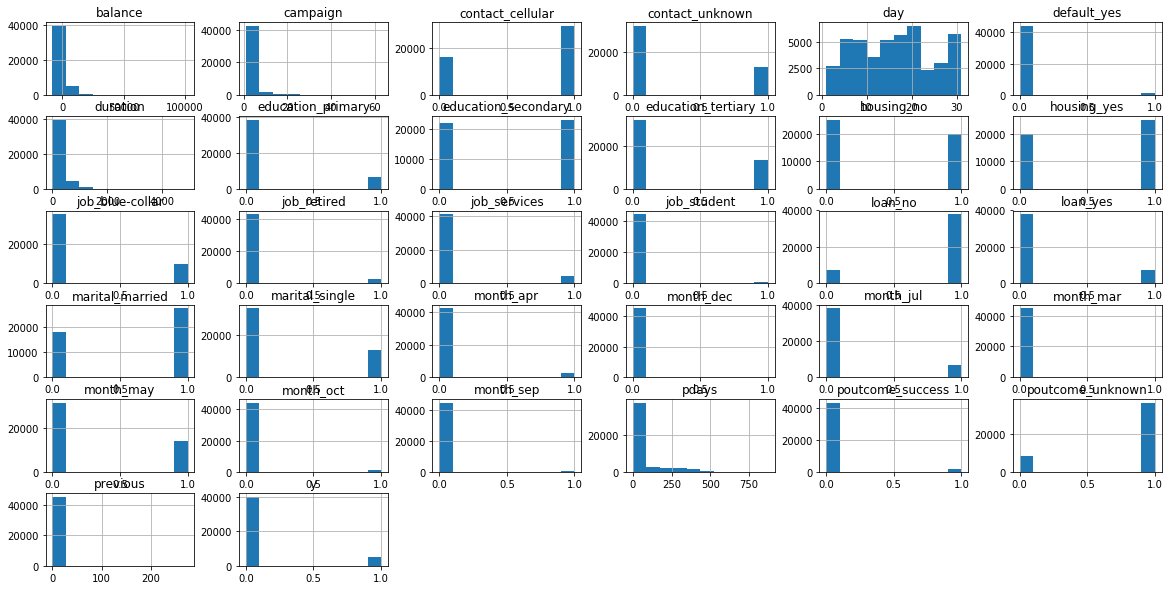

In [65]:
# Using histogram graph to view the distribution of the selected features

df_new.hist(figsize =(20, 10))

# 4. Model Training and Result Evaluation

In [648]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jessesw.com/images/Rec_images/MaskTrain.png")

In [96]:

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# splitting ratio 80: 20
x = df_new.drop('y',axis=1)
y = df_new['y']


# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=x.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=x.columns)



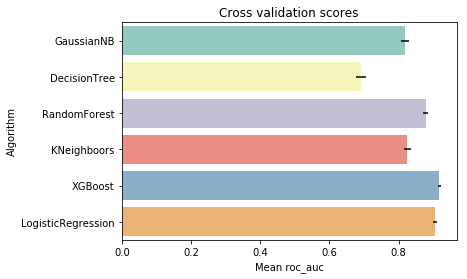

In [97]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["GaussianNB","DecisionTree",
"RandomForest","KNeighboors","XGBoost","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")

# 5. Tuning the hyper-parameter estimators


To improve on each of this model, I applied the Tuning hyperparameter estimators. The method extracts the best model parameters for each learning algorithm. For instance, different models have different parameters that cannot be directly estimated from the model. For example, the k in k-nearest neighbours, the C and sigma hyperparameters for support vector machines.
In most cases, researchers do not directly have control over this value. The values are chosen, and there is no analytical formula available to calculate the values. The importance of this test is to instruct the machine to explore the best possible value for selection. The process of choosing the right set of values is typically known as “Hyperparameter optimisation” or “Hyperparameter tuning”. There are two types of hyperparameter optimisations (Grid search and Random search). In this project, I considered on only Grid search method

# XGboost

In [98]:
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 16.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.025, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.25, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [99]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9237607792631233
Best parameters set: 
 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1.0}


In [ ]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

# Logistic Regression


In [101]:

### Logistic Regression classifier

lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.001  , 0.00107, ..., 0.93325, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [102]:
lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.9065672050446009
Best parameters set: 
 {'C': 0.00162181009735893, 'penalty': 'l2'}


In [103]:

y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

# KNN

In [106]:
### KNN classifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 36.6min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 8, 16], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [107]:

knn_best = grid_knn.best_estimator_
# Best score
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.8722393264946067
Best parameters set: 
 {'n_neighbors': 16, 'weights': 'distance'}


In [108]:

y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

# Random Forest


In [109]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.9min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(2, 7), 'min_samples_split': range(4, 10), 'min_samples_leaf': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [110]:

rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9199811801286772
Best parameters set: 
 {'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [111]:

y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

# Naive bayes gaussian


In [112]:
nb = GaussianNB()

nb_param_grid = {
   

}
grid_nb = GridSearchCV(nb, param_grid = nb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_nb.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=4, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [113]:

nb_best = grid_nb.best_estimator_
# Best score
print('Best Score:', grid_nb.best_score_)
print('Best parameters set: \n', grid_nb.best_params_)

Best Score: 0.8179533512075718
Best parameters set: 
 {}


In [114]:

y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:,1]

In [156]:

# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

6. Calculate Confusion Matrix (Precision, Recall, Accuracy)


In [160]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['No','Yes']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
GaussianNB
Accuracy is 0.8628773637067345
Precision is 0.43583118001722654
Recall is 0.46379468377635197
F1 score is 0.4493783303730018
ROC AUC is 0.8141110641852951


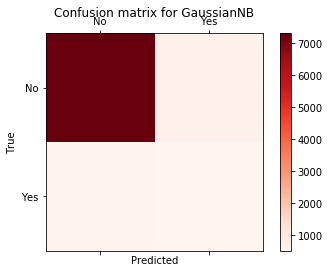

Logisitic Regression
Accuracy is 0.8981532677208891
Precision is 0.6551094890510949
Recall is 0.3290559120073327
F1 score is 0.438071995118975
ROC AUC is 0.9030990480001918


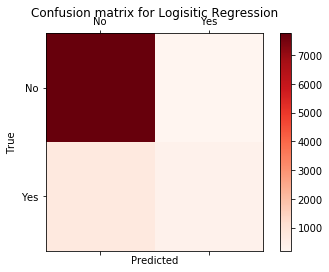

K-Nearest-Neighbors
Accuracy is 0.8929558774742895
Precision is 0.6096256684491979
Recall is 0.31347387717690195
F1 score is 0.414043583535109
ROC AUC is 0.8794499351747516


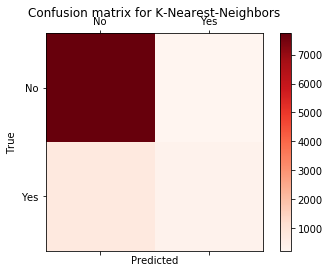

Random Forest
Accuracy is 0.8983744332632976
Precision is 0.6433333333333333
Recall is 0.3538038496791934
F1 score is 0.45653459491425197
ROC AUC is 0.9174054408946807


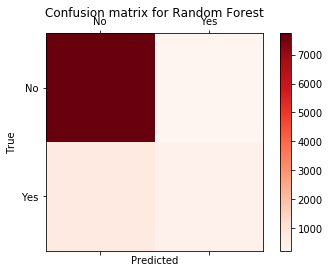

XGBoost Classifier
Accuracy is 0.9061152272475949
Precision is 0.6555269922879178
Recall is 0.4674610449129239
F1 score is 0.5457463884430177
ROC AUC is 0.9201624734659101


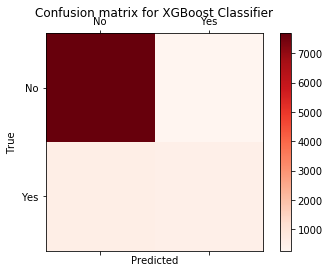

In [161]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("GaussianNB", confusion_matrix(y_test, y_pred_nb), roc_auc_score(y_test, y_prob_nb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

In [163]:
"""
print_grid_search_metrics(grid_nb)
print_grid_search_metrics(grid_rf)
print_grid_search_metrics(grid_knn)
print_grid_search_metrics(grid_lr)
print_grid_search_metrics(grid_xgb)
"""

'\nprint_grid_search_metrics(grid_nb)\nprint_grid_search_metrics(grid_rf)\nprint_grid_search_metrics(grid_knn)\nprint_grid_search_metrics(grid_lr)\nprint_grid_search_metrics(grid_xgb)\n'

# 6. Plot learning curves

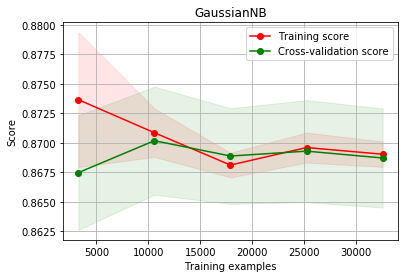

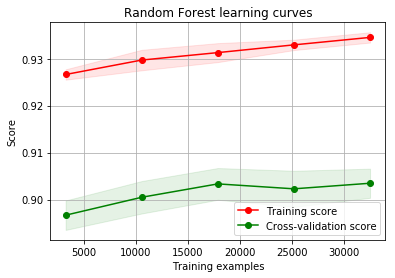

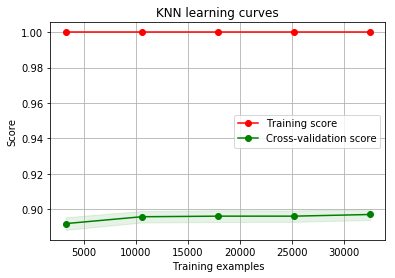

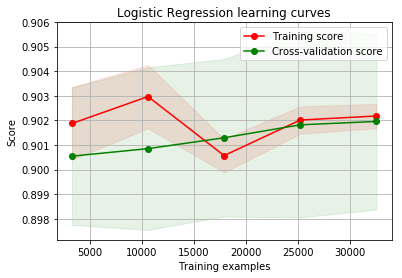

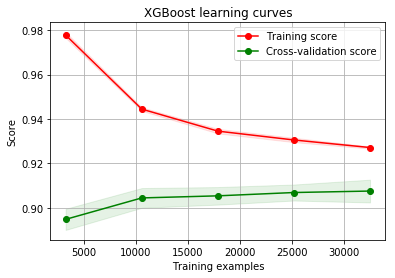

In [ ]:

# Plot learning curves
#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_nb.best_estimator_,"GaussianNB",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

# Feature importance of the favoured classifiers

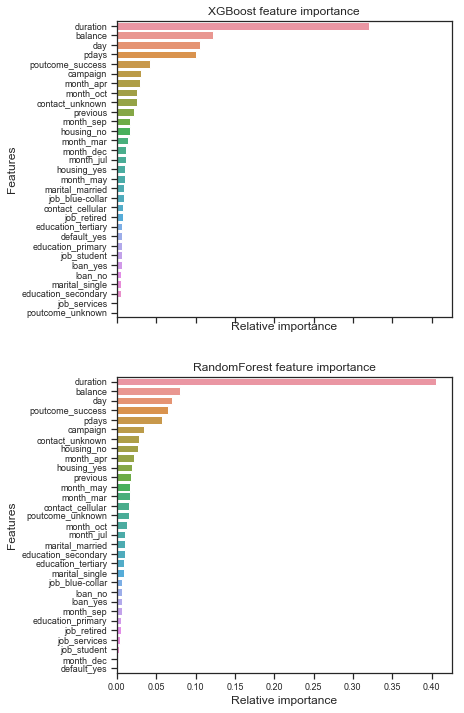

In [654]:
# I explore the importance of each feature with Random forest and XGBoost

#nrows = ncols = 2
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(6,12))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y= X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

# Comparing all selected tuning models with heatmap


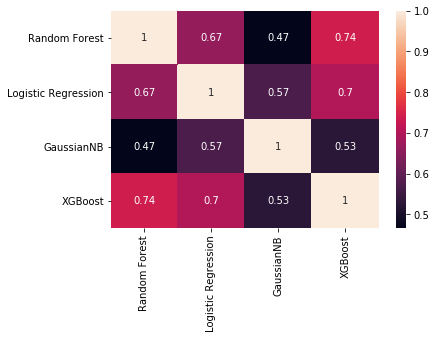

In [189]:
# Concatenate all classifier results

test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_nb = pd.Series(nb_best.predict(X_test), name="GaussianNB")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")


ensemble_results = pd.concat([test_rf, test_lr,test_nb, test_xgb],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

# 7. Combined voting esembling


In [194]:

# I considered the soft voting paramter becuase its into account the probability of each vote

votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('nb', nb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [195]:

y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.9009178370009953
Precision is 0.6440177252584933
Recall is 0.3996333638863428
F1 score is 0.49321266968325794
ROC AUC is 0.9111960949934254


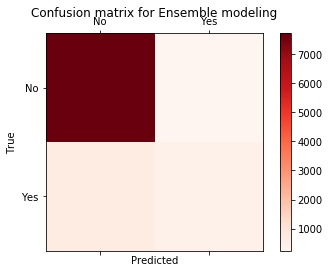

In [196]:

confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

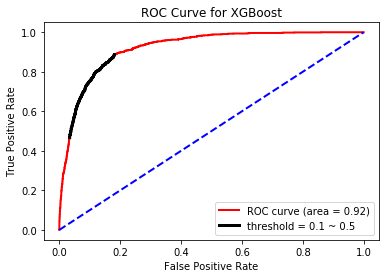

In [197]:
# make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# 8. Model deployment and Threshold value adjustment


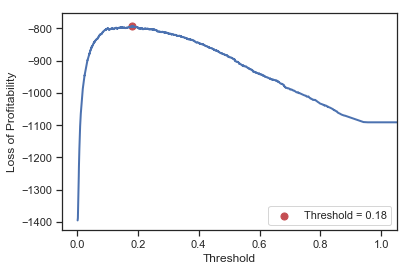

In [649]:
P = 0.5 
loss = TP_grid*P*(-0.1) + TP_grid*(1-P)*(-1) + FN_grid*(-1) + FP_grid*(-0.1)
thresh_best = thresh[loss == max(loss)][0]
    
fig = plt.figure()
plt.plot(thresh, loss, color='b', lw=2)
plt.scatter([thresh_best], [max(loss)], color='r', s=50, label='Threshold = {:.2f}'.format(thresh_best))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Loss of Profitability')
plt.legend(loc="lower right")
plt.show()

XGboost
Accuracy is 0.870728740462236
Precision is 0.47859495060373214
Recall is 0.7992667277726856
F1 score is 0.5986955029179539
ROC AUC is 0.9201624734659101


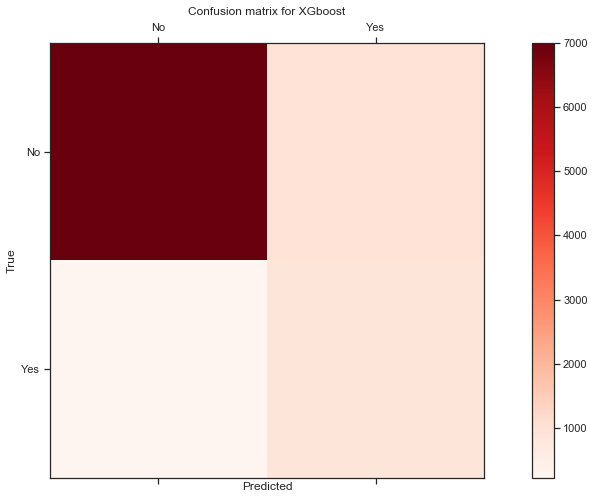

In [625]:
y_pred_xgb_new = y_prob_xgb > thresh_best

confusion_matrices = [
    ("XGboost", confusion_matrix(y_test, y_pred_xgb_new), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)

We see that the loss is minimized at threshold = 0.18. Now let's take a look at the confusion matrix using this threshold.

# 9. Conclusion